In [83]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [84]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (16,8)
warnings.filterwarnings('ignore')

We will load digits data set which cosist of <code>**1797 instances**</code> of <code>**8x8 pixel images**</code>. It fairly small dataset and too small to be representative of a real world machine learning task.

In [85]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
from PIL import Image
image = np.array(Image.open('../images/mano6.jpg'))
image = image[:,:, 0]
plt.imshow(image, cmap='gray');

## Showing the Images and Labels

In [32]:
one_sample = digits.data[:1]
one_sample.shape

(1, 64)

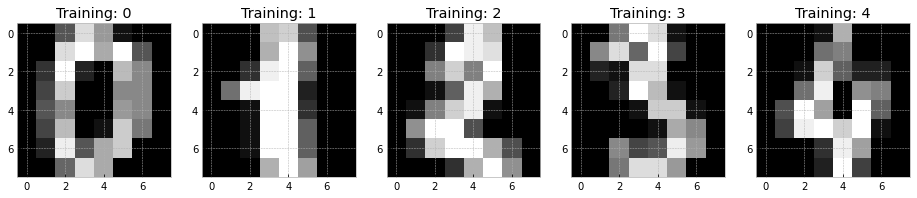

In [86]:
for i, (image, label) in enumerate(zip(digits.data[:5], digits.target[:5])):
    plt.subplot(1 ,5, i+1)
    plt.imshow(np.reshape(image, (8,8)), cmap='gray')
    plt.title(f'Training: {label}')

In [87]:
X = digits.data
y = digits.target

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=0, stratify=y)

In [38]:
def test_size(a, b):
    print(f'X matrix shape: {a.shape}')
    print(f'y vector size: {b.shape}')
    if (len(a) == len(b)):
        print('we are good to go')
    else:
        print(f'lenght of X: {len(a)} \n')
        print(f'lenght of y: {len(b)}')
        

In [43]:
test_size(X_train, y_train)

X matrix shape: (1437, 64)
y vector size: (1437,)
we are good to go


In [ ]:
ovo = (n * (n-1)/2)
ovr = n 

In [89]:
lgr = LogisticRegression(max_iter=10000)

##  Logistic regression solver options:

* For small datasets, <code>**liblinear**</code> is a good choice, whereas <code>**sag**</code> and <code>**saga**</code> are faster for large ones.

* For multiclass problems, only  <code>**newton-cg**</code>, <code>**sag**</code>, <code>**saga**</code> and <code>**lbfgs**</code> handle multinomial loss; <code>**liblinear**</code> is limited to <code>**one versus rest**</code> schemes.

* <code>**newton-cg**</code>, <code>**lbfgs**</code>, <code>**sag**</code> and <code>**saga**</code>, handle L2 or no penalty

* <code>**liblinear**</code> and <code>**saga**</code> also handle L1 penalty

* <code>**saga**</code> also supports elasticnet penalty

* <code>**liblinear**</code> does not support setting penalty='none'

In [90]:
lgr.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 10000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None}

<code>**Default hyperparameters:**</code>

* C=1.0, 
* class_weight=None, 
* dual=False, 
* fit_intercept=True, 
* intercept_scaling=1, 
* max_iter=100, 
* multi_class='ovr',
* n_jobs=1, penalty='12',
* random_state=None, 
* solver='liblinear', 
* tol=0.0001,
* verbose=0, 
* warm_start=False

In [91]:
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [67]:
our_test = image.reshape(1, 64)
our_test

array([[  0, 160, 254, 255, 255, 252,   0,   0,   0,  99, 255,   3,   2,
          0,   0,   0,   0, 134, 255,   0,   0,   0,   0,   1,   0, 186,
        254, 237, 233, 216,  11,   0,   0,  82, 255, 117, 131, 232,   3,
          0,   0,  44, 254,   0,  30, 253,   7,   0,   0,  31, 255,   0,
         13, 254,  13,   0,   0, 209, 255, 254, 249, 251,   0,   0]],
      dtype=uint8)

In [95]:
sample = X_test[5].reshape(1, -1)
sample.shape

(1, 64)

In [68]:
test_predict = lgr.predict(our_test)
test_predict

array([5])

## Visualize sample

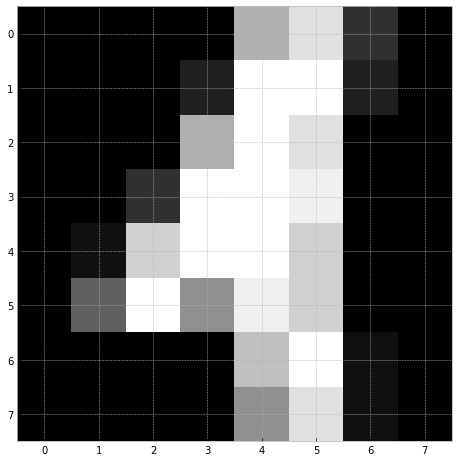

In [91]:
plt.imshow(np.reshape(sample, (8,8)), cmap='gray');

In [92]:
lgr.predict(sample)

array([1])

## Make predictions on entire set

In [56]:
digits_predictions = lgr.predict(X_test)

## Measure model performance

### R² - coefficient of determination

In [57]:
score = lgr.score(X_test, y_test)
score

0.9611111111111111

## Confusion matrix

A confusion matri is a table that is often used to describe the performance of a classfication model on a set of test data for whic the true values are known.

In [58]:
def plot_conf_matrix(matrix, title="Land of confusion", cmap='cool'):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"], rotation = 45, size = 10)
    plt.yticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    width, height = matrix.shape
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(matrix[x][y]), xy=(x, y), horizontalalignment='center', verticalalignment='center')

In [59]:
confusion = metrics.confusion_matrix(y_test, digits_predictions)

In [60]:
print(confusion)v

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  1  0]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  1  0  0 34  0  0  0  1  0]
 [ 0  0  0  1  0 35  0  1  0  0]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  3  0  0  0  0  1  0 30  1]
 [ 0  0  0  0  0  1  0  0  0 35]]


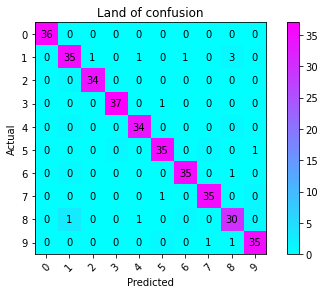

In [61]:
plot_conf_matrix(confusion)

In [3]:
%matplotlib inline
import glob
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [56]:
def resize(image, width = None, height = None, inter = cv.INTER_AREA):
    dim = None
    (h, w) = image.shape
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv.resize(image, dim, interpolation = inter)
    return resized

In [42]:
import os

C:\education\class\machine_learning\__logistic_regression


In [ ]:
import cv2 as cv

In [67]:
samples = []
images = glob.glob('./numbers/*.jpg')
for i in images:
    i = cv.imread(i)
    i = cv.cvtColor(i, cv.COLOR_BGR2GRAY)
    i = cv.bitwise_not(i)
    _, i = cv.threshold(i, 128, 255, cv.THRESH_BINARY)
#   print(i.shape)
    i = resize(i, width=480, height=360)
    i = resize(i, width=240, height=180)
    i = resize(i, width=120, height=90)
    i = resize(i, width=8, height=8)
    samples.append(i)

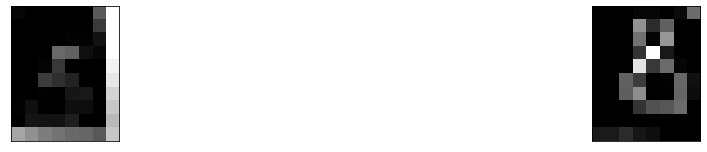

In [68]:

plt.subplots(figsize=(16,16), constrained_layout=True)
l = len(samples)
for i in range(2):
    plt.subplot(8, 2, i+1)
    plt.imshow(samples[i], 'gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

In [69]:
samples[1].shape


(10, 8)

In [80]:
single = samples[1][:8, :8]
single = np.reshape(single, (8,8))

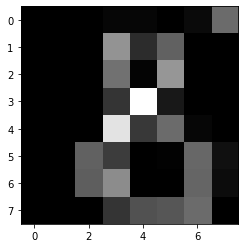

In [82]:
plt.imshow(single, 'gray');

In [101]:
item = single.reshape(1, -1)

In [103]:
item.shape

(1, 64)

In [105]:
lgr.predict(item)

array([1])

## MNIST dataset

We are going to use the MNIST dataset because it is for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. This dataset doesn't come from within scikit-learn datasets. [MNIST dataset](http://yann.lecun.com/exdb/mnist/).<br>

Four files are available on this site for separate download:

* <code>**train-images-idx3-ubyte.gz:**</code>  training set images (9912422 bytes)
* <code>**train-labels-idx1-ubyte.gz:**</code>  training set labels (28881 bytes)
* <code>**t10k-images-idx3-ubyte.gz:**</code>   test set images (1648877 bytes)
* <code>**t10k-labels-idx1-ubyte.gz:**</code>   test set labels (4542 bytes)

Basically its a database of handwritten digits with 784 features, It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples.